Newton's Method: x* = [-0.13332284 -0.22322745  0.06115486  0.0346867  -0.35979406 -0.2063114
  0.18919141  0.0090809  -0.20229784  0.83195857], f(x*) = 2.5474087151512923


<ipython-input-2-c355ca976b32>:43: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(errors), label="Newton's Method")
<ipython-input-2-c355ca976b32>:51: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values), label="Newton's Method")


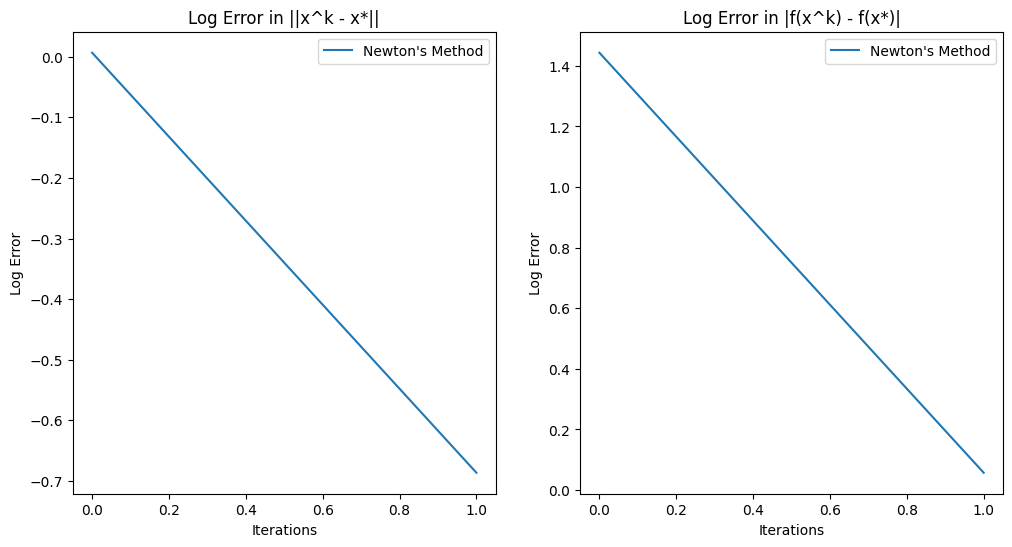

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute value, gradient, and Hessian of the objective function
def f(x, A, y):
    value = 0.5 * np.linalg.norm(A @ x - y) ** 2
    gradient = A.T @ (A @ x - y)
    hessian = A.T @ A
    return value, gradient, hessian

# Backtracking line search
def backtracking_line_search(x, grad, direction, f, A, y, alpha=0.99, rho=0.5, gamma=0.5):
    t = 1
    while f(x + t * direction, A, y)[0] > f(x, A, y)[0] + gamma * t * grad.dot(direction):
        t *= rho
    return t

# Newton's method
def newton_method(A, y, x0, tau=1e-4, max_iter=100):
    x = x0
    history = []
    for _ in range(max_iter):
        value, gradient, hessian = f(x, A, y)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        try:
            direction = -np.linalg.solve(hessian, gradient)
        except np.linalg.LinAlgError:
            direction = -gradient  # Use gradient descent if Hessian is not invertible
        t = backtracking_line_search(x, gradient, direction, f, A, y)
        x += t * direction
    return x, history

# Plot results
def plot_results_newton(history, x_star):
    errors = [np.linalg.norm(x - x_star) for x, _ in history]
    values = [abs(f - history[-1][1]) for _, f in history]
    plt.figure(figsize=(12, 6))

    # Plot log error in ||x^k - x*||
    plt.subplot(1, 2, 1)
    plt.plot(np.log(errors), label="Newton's Method")
    plt.title("Log Error in ||x^k - x*||")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

    # Plot log error in |f(x^k) - f(x*)|
    plt.subplot(1, 2, 2)
    plt.plot(np.log(values), label="Newton's Method")
    plt.title("Log Error in |f(x^k) - f(x*)|")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

# Main code for Question 3
if __name__ == "__main__":
    # Problem setup
    np.random.seed(0)
    n, m = 10, 20
    A = np.random.randn(m, n)
    y = np.random.randn(m)
    x0 = np.zeros(n)

    # Solve using Newton's method
    x_newton, history_newton = newton_method(A, y, x0)
    print(f"Newton's Method: x* = {x_newton}, f(x*) = {history_newton[-1][1]}")

    # Plot results
    plot_results_newton(history_newton, history_newton[-1][0])
    plt.show()


BFGS Method: x* = [-0.13332284 -0.22322745  0.06115486  0.0346867  -0.35979406 -0.2063114
  0.18919141  0.0090809  -0.20229784  0.83195857], f(x*) = 2.5474087151512923


<ipython-input-3-5d3391e20fca>:46: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(errors), label="BFGS Method")
<ipython-input-3-5d3391e20fca>:54: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values), label="BFGS Method")


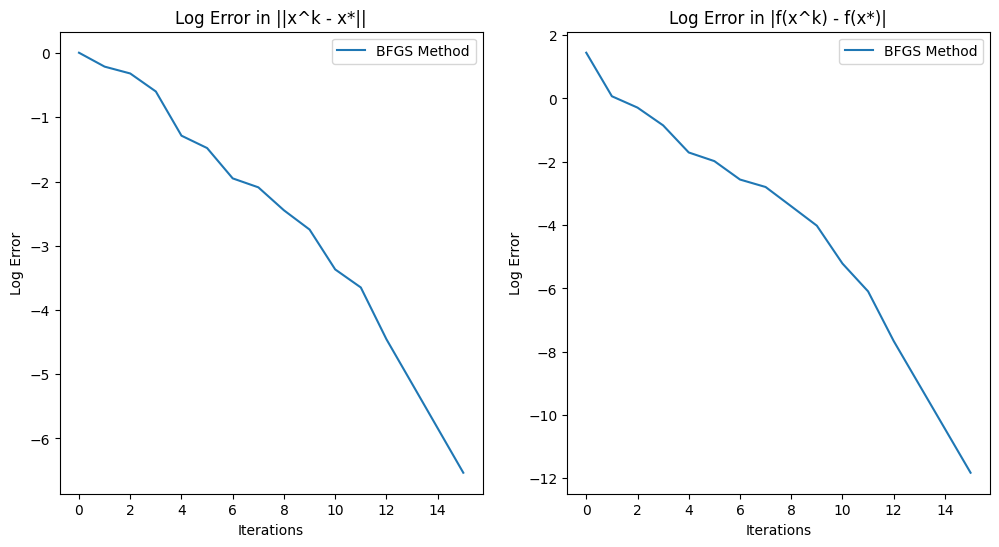

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute value and gradient of the objective function
def f(x, A, y):
    value = 0.5 * np.linalg.norm(A @ x - y) ** 2
    gradient = A.T @ (A @ x - y)
    return value, gradient

# Backtracking line search
def backtracking_line_search(x, grad, direction, f, A, y, alpha=0.99, rho=0.5, gamma=0.5):
    t = 1
    while f(x + t * direction, A, y)[0] > f(x, A, y)[0] + gamma * t * grad.dot(direction):
        t *= rho
    return t

# BFGS method
def bfgs_method(A, y, x0, tau=1e-4, max_iter=100):
    x = x0
    n = len(x0)
    B = np.eye(n)
    history = []
    for _ in range(max_iter):
        value, gradient = f(x, A, y)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        direction = -np.linalg.solve(B, gradient)
        t = backtracking_line_search(x, gradient, direction, f, A, y)
        s = t * direction
        x_new = x + s
        gradient_new = f(x_new, A, y)[1]
        y_vec = gradient_new - gradient
        B += np.outer(y_vec, y_vec) / y_vec.dot(s) - B @ np.outer(s, s) @ B / s.dot(B @ s)
        x = x_new
    return x, history

# Plot results
def plot_results_bfgs(history, x_star):
    errors = [np.linalg.norm(x - x_star) for x, _ in history]
    values = [abs(f - history[-1][1]) for _, f in history]
    plt.figure(figsize=(12, 6))

    # Plot log error in ||x^k - x*||
    plt.subplot(1, 2, 1)
    plt.plot(np.log(errors), label="BFGS Method")
    plt.title("Log Error in ||x^k - x*||")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

    # Plot log error in |f(x^k) - f(x*)|
    plt.subplot(1, 2, 2)
    plt.plot(np.log(values), label="BFGS Method")
    plt.title("Log Error in |f(x^k) - f(x*)|")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

# Main code for Question 4
if __name__ == "__main__":
    # Problem setup
    np.random.seed(0)
    n, m = 10, 20
    A = np.random.randn(m, n)
    y = np.random.randn(m)
    x0 = np.zeros(n)

    # Solve using BFGS method
    x_bfgs, history_bfgs = bfgs_method(A, y, x0)
    print(f"BFGS Method: x* = {x_bfgs}, f(x*) = {history_bfgs[-1][1]}")

    # Plot results
    plot_results_bfgs(history_bfgs, history_bfgs[-1][0])
    plt.show()


Newton's Method: x* = [-0.13332284 -0.22322745  0.06115486  0.0346867  -0.35979406 -0.2063114
  0.18919141  0.0090809  -0.20229784  0.83195857], f(x*) = 2.5474087151512923
Time taken by Newton's method: 0.000322 seconds
BFGS Method: x* = [-0.13332284 -0.22322745  0.06115486  0.0346867  -0.35979406 -0.2063114
  0.18919141  0.0090809  -0.20229784  0.83195857], f(x*) = 2.5474087151512923
Time taken by BFGS method: 0.005940 seconds


<ipython-input-6-c248169cde22>:86: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(errors), label="Newton's Method")
<ipython-input-6-c248169cde22>:94: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values), label="Newton's Method")
<ipython-input-6-c248169cde22>:47: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(errors), label="BFGS Method")
<ipython-input-6-c248169cde22>:55: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values), label="BFGS Method")


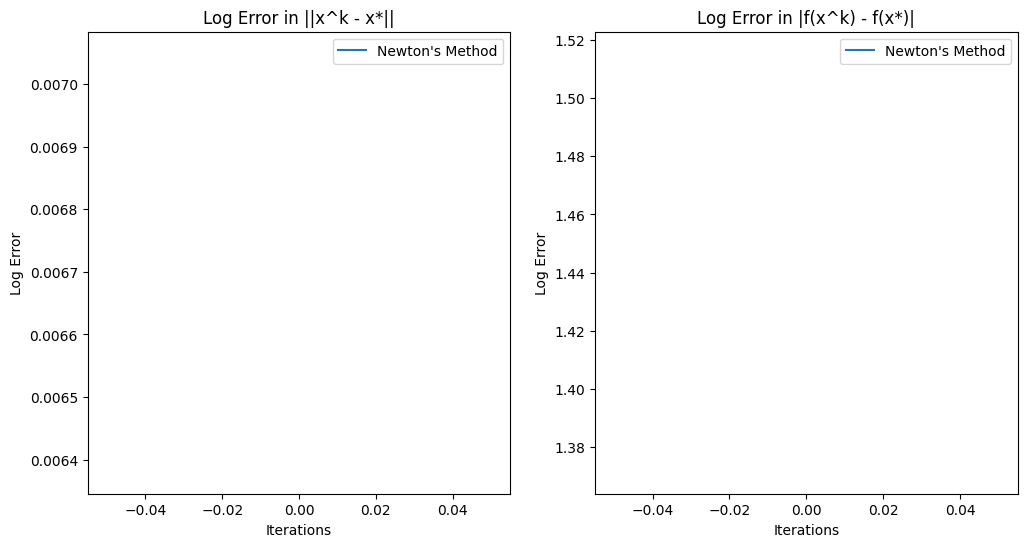

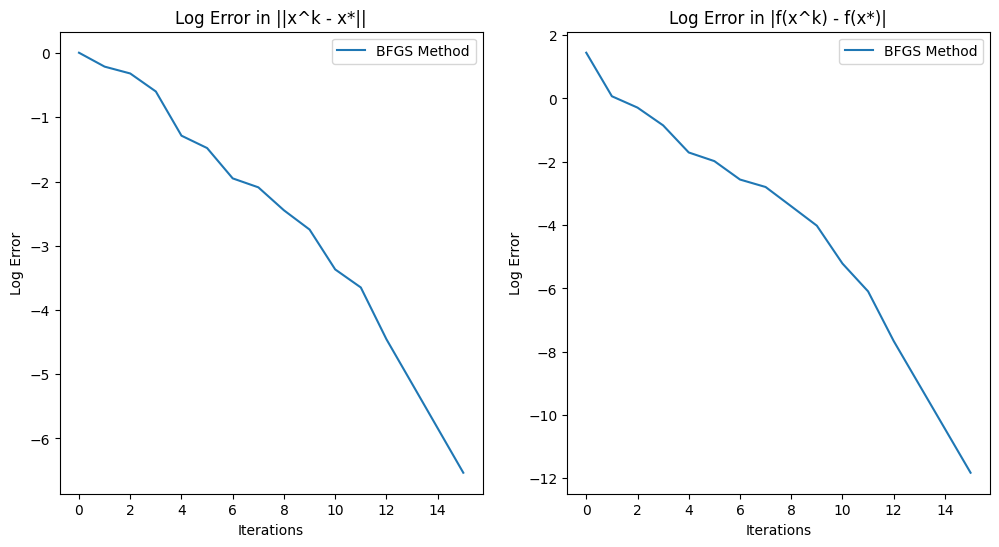


Comparison of Time Taken:
Newton's Method: 0.000322 seconds
BFGS Method: 0.005940 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to compute value and gradient of the objective function
def f(x, A, y):
    value = 0.5 * np.linalg.norm(A @ x - y) ** 2
    gradient = A.T @ (A @ x - y)
    return value, gradient

# Backtracking line search
def backtracking_line_search(x, grad, direction, f, A, y, alpha=0.99, rho=0.5, gamma=0.5):
    t = 1
    while f(x + t * direction, A, y)[0] > f(x, A, y)[0] + gamma * t * grad.dot(direction):
        t *= rho
    return t

# BFGS method
def bfgs_method(A, y, x0, tau=1e-4, max_iter=100):
    x = x0
    n = len(x0)
    B = np.eye(n)
    history = []
    for _ in range(max_iter):
        value, gradient = f(x, A, y)
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        direction = -np.linalg.solve(B, gradient)
        t = backtracking_line_search(x, gradient, direction, f, A, y)
        s = t * direction
        x_new = x + s
        gradient_new = f(x_new, A, y)[1]
        y_vec = gradient_new - gradient
        B += np.outer(y_vec, y_vec) / y_vec.dot(s) - B @ np.outer(s, s) @ B / s.dot(B @ s)
        x = x_new
    return x, history

# Function to plot results of BFGS
def plot_results_bfgs(history, x_star):
    errors = [np.linalg.norm(x - x_star) for x, _ in history]
    values = [abs(f - history[-1][1]) for _, f in history]
    plt.figure(figsize=(12, 6))

    # Plot log error in ||x^k - x*||
    plt.subplot(1, 2, 1)
    plt.plot(np.log(errors), label="BFGS Method")
    plt.title("Log Error in ||x^k - x*||")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

    # Plot log error in |f(x^k) - f(x*)|
    plt.subplot(1, 2, 2)
    plt.plot(np.log(values), label="BFGS Method")
    plt.title("Log Error in |f(x^k) - f(x*)|")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

# Newton's method for optimization
def newton_method(A, y, x0, tau=1e-4, max_iter=100):
    x = x0
    history = []
    for _ in range(max_iter):
        value, gradient = f(x, A, y)  # Unpack only value and gradient
        history.append((x.copy(), value))
        if np.linalg.norm(gradient) < tau:
            break
        # Compute Hessian (in this case, the Jacobian of the gradient)
        hessian = A.T @ A
        # Solve for Newton's direction
        direction = np.linalg.solve(hessian, -gradient)
        # Update the solution
        x = x + direction
    return x, history

# Function to plot results of Newton's method
def plot_results_newton(history, x_star):
    errors = [np.linalg.norm(x - x_star) for x, _ in history]
    values = [abs(f - history[-1][1]) for _, f in history]
    plt.figure(figsize=(12, 6))

    # Plot log error in ||x^k - x*||
    plt.subplot(1, 2, 1)
    plt.plot(np.log(errors), label="Newton's Method")
    plt.title("Log Error in ||x^k - x*||")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

    # Plot log error in |f(x^k) - f(x*)|
    plt.subplot(1, 2, 2)
    plt.plot(np.log(values), label="Newton's Method")
    plt.title("Log Error in |f(x^k) - f(x*)|")
    plt.xlabel("Iterations")
    plt.ylabel("Log Error")
    plt.legend()

# Main code for comparing Newton's and BFGS methods
if __name__ == "__main__":
    # Problem setup
    np.random.seed(0)
    n, m = 10, 20
    A = np.random.randn(m, n)
    y = np.random.randn(m)
    x0 = np.zeros(n)

    # Solve using Newton's method
    start_time = time.time()
    x_newton, history_newton = newton_method(A, y, x0)
    newton_time = time.time() - start_time
    print(f"Newton's Method: x* = {x_newton}, f(x*) = {history_newton[-1][1]}")
    print(f"Time taken by Newton's method: {newton_time:.6f} seconds")

    # Plot results of Newton's method
    plot_results_newton(history_newton, history_newton[-1][0])

    # Solve using BFGS method
    start_time = time.time()
    x_bfgs, history_bfgs = bfgs_method(A, y, x0)
    bfgs_time = time.time() - start_time
    print(f"BFGS Method: x* = {x_bfgs}, f(x*) = {history_bfgs[-1][1]}")
    print(f"Time taken by BFGS method: {bfgs_time:.6f} seconds")

    # Plot results of BFGS method
    plot_results_bfgs(history_bfgs, history_bfgs[-1][0])

    # Show both plots
    plt.show()

    # Compare times
    print(f"\nComparison of Time Taken:\nNewton's Method: {newton_time:.6f} seconds\nBFGS Method: {bfgs_time:.6f} seconds")
